In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Описание проектной задачи

Распознавание чисел на изображениях — это задача многоклассовой классификации. В качестве объекта, для которого необходимо предсказать класс, выступает изображение. Возможных классов столько, сколько в данных представлено чисел, которые необходимо научиться распознавать.

В качестве данных для решения задачи будут использоваться изображения из базы данных MNIST — классического набора данных для создания и проверки качества работы алгоритмов компьютерного зрения.

MNIST состоит из чёрно-белых изображений рукописных цифр. В базе представлены изображения цифр от 0
до 9. Каждое изображение имеет разрешение 28×28 пикселей.

В данных, которые будут использоваться для решения задачи, представлено 42 000 изображений. Это подмножество всех данных, доступных в MNIST.

In [3]:
# чтение и вывод данных
data = pd.read_csv('images.csv')
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Изображение размером **28 × 28** представляется в виде последовательности из **784** чисел — по одному числу на каждый пиксель изображения. Каждое число находится в диапазоне от **0** до **255**. Чем больше число, тем выше интенсивность пикселя. Нулевой интенсивности соответствует абсолютно чёрный пиксель, максимальной — абсолютно белый.

В таблице есть колонки **pixel0**, **pixel1** и так далее до **pixel783**, каждая из которых соответствует значению конкретного пикселя изображения. Также в таблице есть колонка **label**, в которой находится информация о том, какая цифра представлена на изображении.

7


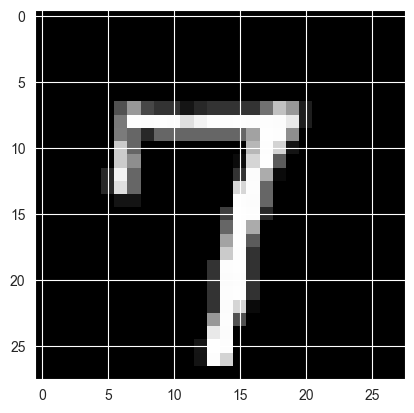

In [4]:
# просмотр изображения из данных
idx = 6
img = data.iloc[idx].to_numpy()[1:].reshape(28, 28)
print(data['label'].iloc[idx])
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Исследовательский анализ данных

In [5]:
# общее количество пропусков по всем данным
print(data.isnull().sum().sum())

0


Пропусков в данных нет, следовательно их не нужно обрабатывать.

In [6]:
# количество объектов каждого класса в данных
data.groupby('label')['pixel0'].count()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: pixel0, dtype: int64

Классы в данных распределены равномерно - модель обучится на каждой группе одинаково.

In [35]:
# вывод статистики по всех столбцам
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


В некоторых факторах, принимаются только 0 значения. Соответсвующее этим факторам пиксели не дают никакой информации. Выведем изображения некоторых чисел, чтобы понять, где эти пиксели находятся и можно ли их убрать.

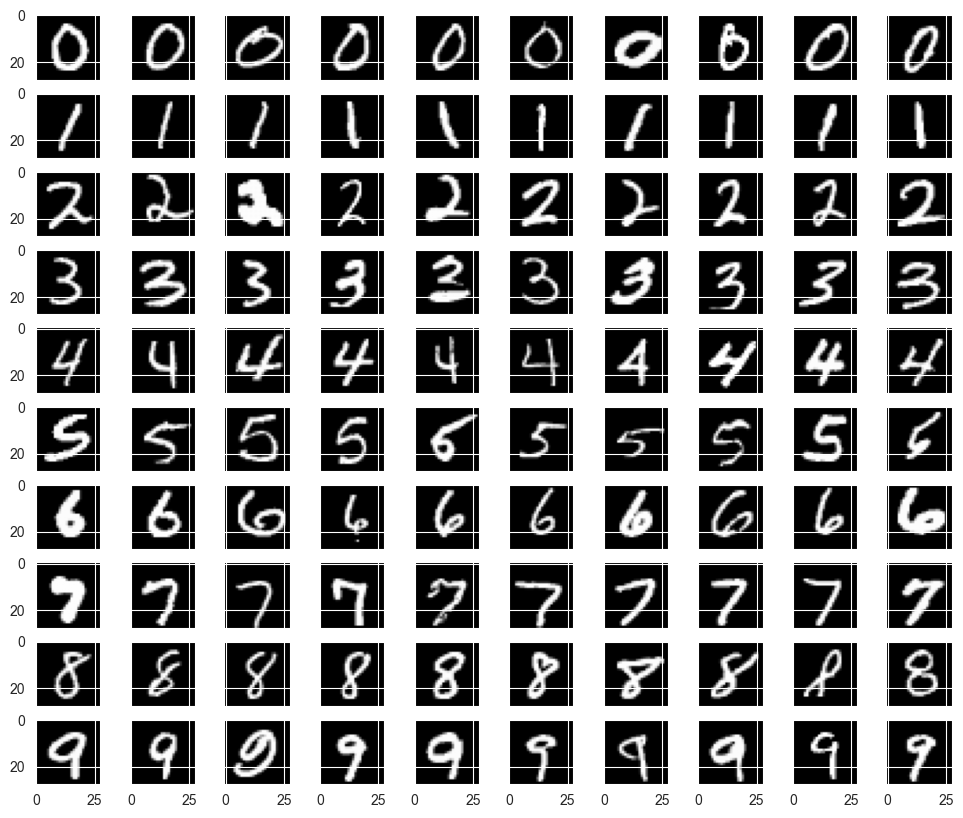

In [34]:
# вывод по 10 изображений каждого класса
fig, axs = plt.subplots(10, 10, figsize=(12, 10),
                        sharex=True, sharey=True)

for label, group in data.groupby('label', as_index=False):
    numbers = group.sample(10, random_state=42).drop(columns='label')
    img_vectors = [x.values.reshape(28, 28) for _, x in numbers.iterrows()]

    for i, img in enumerate(img_vectors):
        axs[label, i].imshow(img, cmap='gray', vmin=0, vmax=255)

По изображениям цифр видно, что некоторая часть пикселей по краям не несёт никакой информации. Вероятно получится удалить неинформативные пиксели, что улучшит качество модели.

За неинформативный пиксель будем пиксели, для которых разброс значений равен нулю. Факторы, соответствующие этим пикселям, можно убрать из данных: в них не содержится никакой информации.

<Axes: >

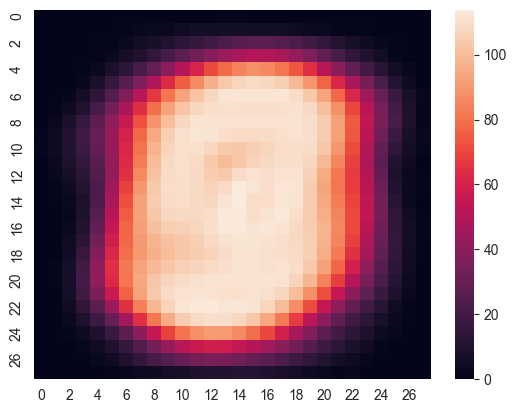

In [9]:
sns.heatmap(data.std()[1:].to_numpy().reshape(28, 28))

По краям есть неинформативный пиксели, которые следует убрать.

# Отбор факторов

Заметно, что по краям есть неинформативный пиксели, которые следует убрать. Для этого воспользуемся объектом для отбора факторов из библиотеки `sklearn`- `VarianceThreshold`, который уберёт все колонки с квадратом разброса, не превосходящим заданного значения.

In [10]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)

In [11]:
selector.fit(data)

VarianceThreshold(threshold=0)